# ANALISI E COSTRUZIONE MODELLI PREDITTIVI PER IL DATASET FETAL HEALTH (SALUTE FETALE)

## Introduzione

Abbiamo a che fare con un problema di classificazione multiclasse in cui ci troveremo appunto a classificare lo stato di salute di un feto date alcune informazioni. 

Il notebook sarà suddiviso in due parti:
- EDA, analisi del dataset
- MODELLI PREDITTIVI, metriche di valutazione, creazione dei modelli, validazione, training e testing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/data/fetal_health.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold

In [3]:
df = pd.read_csv(path)
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


## EDA (Analisi dati esplicativa)

In [4]:
#possiamo arrotondare l'indice di salute fetale
df["fetal_health"] = df["fetal_health"].apply(lambda x: round(x))

In [5]:
x = df.drop(columns = "fetal_health")
y = df["fetal_health"]
y

0       2
1       1
2       1
3       1
4       1
       ..
2121    2
2122    2
2123    2
2124    2
2125    1
Name: fetal_health, Length: 2126, dtype: int64

Dividiamo il dataset in training e test set

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=11)
print("Dimensione train set: ", len(x_train))
print("Dimensione test set: ", len(x_test))

Dimensione train set:  1488
Dimensione test set:  638


In [7]:
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

dfMaxMin = df.apply(minMax)
dfMaxMin

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
min,106.0,0.000,0.000,0.000,0.000,0.000,0.000,12.0,0.2,0.0,...,50.0,122.0,0.0,0.0,60.0,73.0,77.0,0.0,-1.0,1
max,160.0,0.019,0.481,0.015,0.015,0.001,0.005,87.0,7.0,91.0,...,159.0,238.0,18.0,10.0,187.0,182.0,186.0,269.0,1.0,3


Da qui vediamo che può essere necessario scalare le feature in quanto i valori sono distribuiti su intervalli eccessivamente ampi.

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Controlliamo se esistono valori mancanti.

In [9]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

Sono assenti valori nulli.

Effettueremo l'analisi sull'intero dataset per avere una migliore visione d'insieme

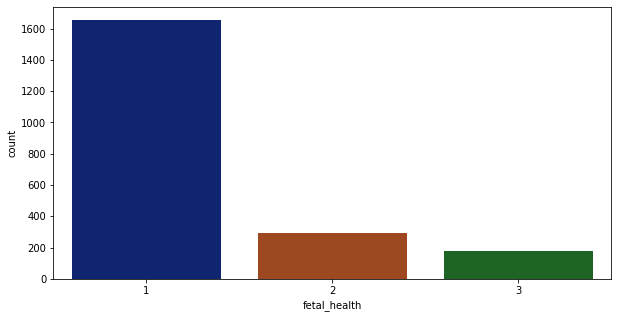

In [10]:
plt.figure(figsize = (10,5))
sns.countplot(x = "fetal_health", data = df, palette = "dark")

La maggioranza dei samples ha come indice di salute fetale 1 (normale), meno di un terzo ha indice 2 che indica uno stato di salute sospetto e solo meno di 200 samples su più di 2000 (meno del 10%) con indice 3 sono patologici.

Possiamo concludere che il dataset non è ben bilanciato.


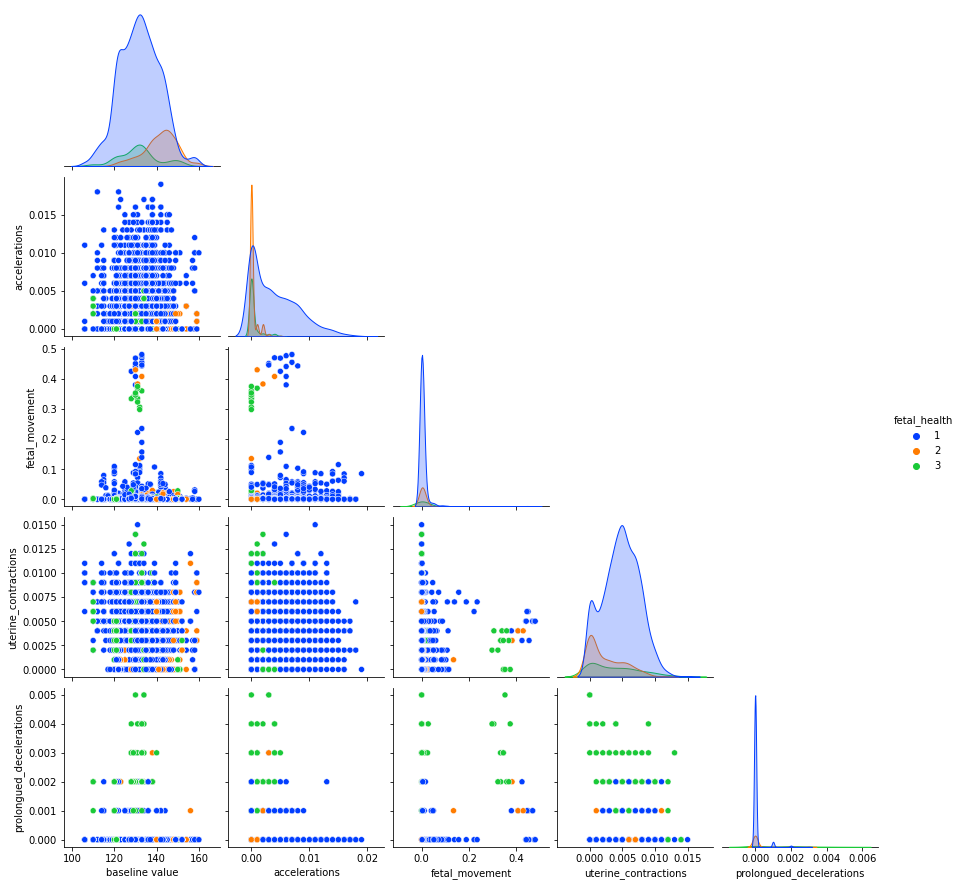

In [11]:
cols = ["baseline value", "accelerations", "fetal_movement", "uterine_contractions",
        "prolongued_decelerations", "fetal_health"]

sns.pairplot(df[cols], hue="fetal_health", palette = "bright", 
             kind = "scatter",
             corner = True,
             diag_kws = {"fill" : True})
            
plt.show()

Ciò che emerge dal grafico è che i feti di salute peggiore tendenzialmente hanno numerosi rallentamenti prolungati in relazione a contrazioni uterine, valore di baseline, movimento fetale e accelerazione: mentre per quanto riguarda i feti che godono di buona salute questi valori oscillano tra 0 e 0.002 decisamente inferiori al range 0.002-0.005 dei feti di classe 3.

Inoltre, generalmente i feti patologici hanno valori di contrazioni uterine molto bassi rispetto agli altri, e questo trend si può notare nelle altre features presenti nel grafico.


### Outliers

Il metodo EllipticEnvelope "disegna" un'ellisse immaginaria sul grafico al cui esterno ci saranno solo gli outliers. 

In [12]:
from sklearn.covariance import EllipticEnvelope

ee = EllipticEnvelope(contamination=0.01)
yhat = ee.fit_predict(x_train)
# select all rows that are not outliers
mask = yhat != -1
outlier = [i for i in mask if i == False]
print("Percentuale di outliers nel dataset: %.3f" %(len(outlier)*100 / len(df)))

Percentuale di outliers nel dataset: 0.706


In [13]:
#eliminazione outliers

for i in range(len(yhat)):
    if yhat[i] == -1:
        df.drop(i,inplace = True)
        

### Correlazione

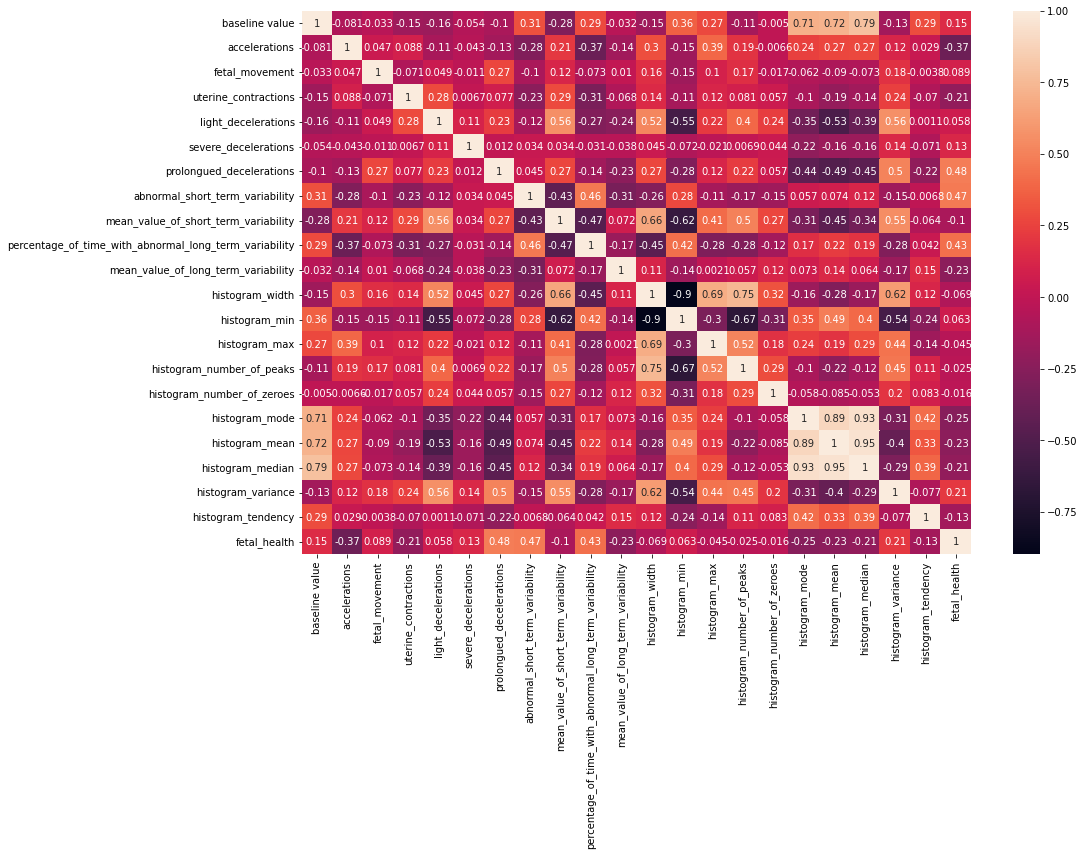

In [14]:
plt.figure(figsize=(15,10))
corr_matr = df.corr()
sns.heatmap(corr_matr, annot=True)
plt.show()

Si può osservare un'elevata correlazione tra le seguenti features:

-histogram median e histogram mean (0.95)

-histogram median e histogram mode (0.93)

-histogram mode e histogram mean (0.89)

e una considerevole correlazione inversa tra:

-histogram min e histogram width (-0.9)

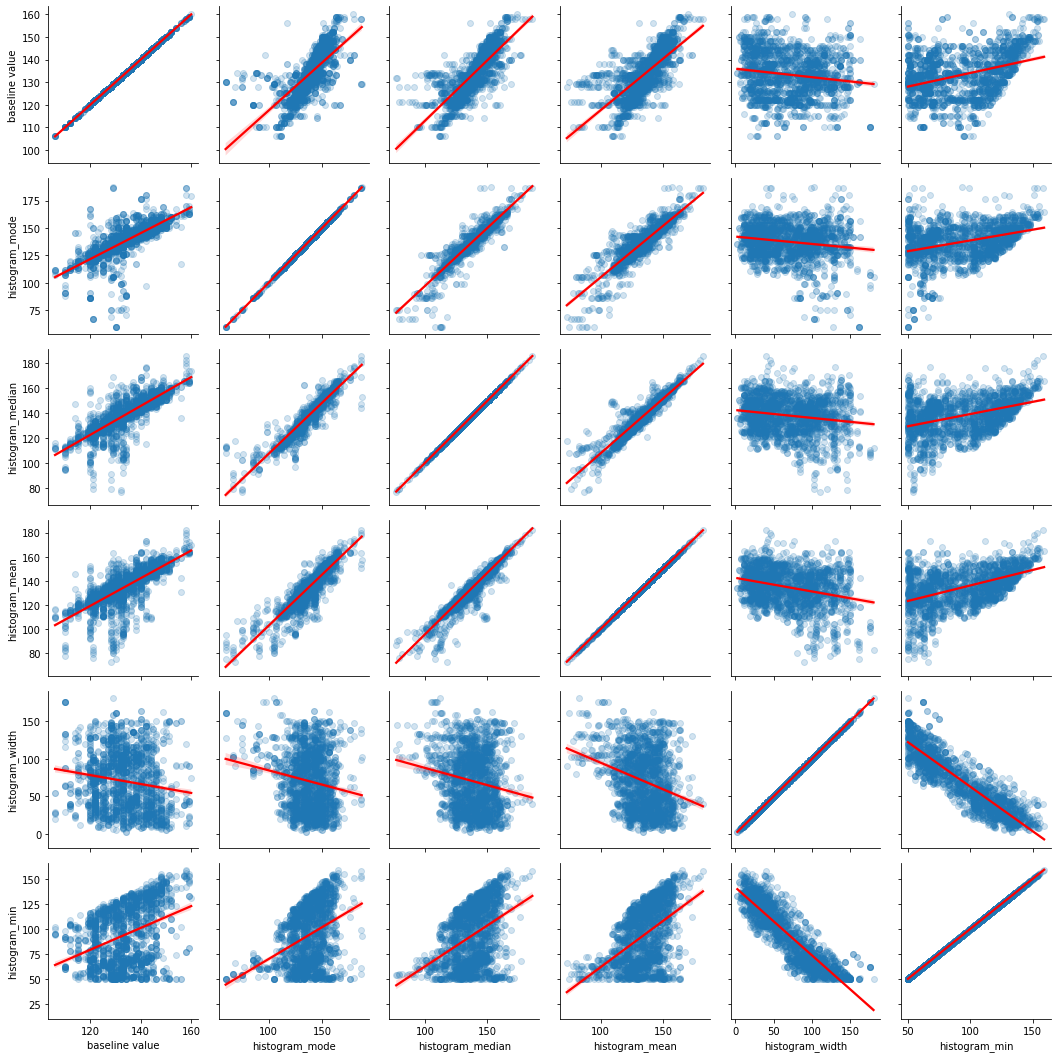

In [15]:
#creiamo un dataframe con le colonne interessate
corr_df = df[['baseline value', 'histogram_mode', 'histogram_median', 'histogram_mean', 
        'histogram_width', 'histogram_min']]

g = sns.PairGrid(corr_df)
g = g.map(sns.regplot, scatter_kws={'alpha':0.2}, line_kws={'color': 'red'})

Con questo grafico possiamo visualizzare graficamente la correlazione e corr. inversa delle features che avevano un valore considerevole. Si può osservare come spicchi fra tutte la correlazione tra histogram_mean e histogram_median, histogram_mode e histogram_median. Inoltre la feature histogram_mean è quella che in generale ha una correlazione costantemente elevata con tutte le latre.

Considerando ciò possiamo eliminare alcune delle features.


In [16]:
df.drop(["histogram_mean", "histogram_min"], axis=1, inplace=True)
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,126.0,2.0,0.0,120.0,121.0,73.0,1.0,2
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,198.0,6.0,1.0,141.0,140.0,12.0,0.0,1
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,198.0,5.0,1.0,141.0,138.0,13.0,0.0,1
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,170.0,11.0,0.0,137.0,137.0,13.0,1.0,1
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,170.0,9.0,0.0,137.0,138.0,11.0,1.0,1


### Selezione features

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif

Text(0.5, 1.0, 'Feature scores con selezione mutual sel.')

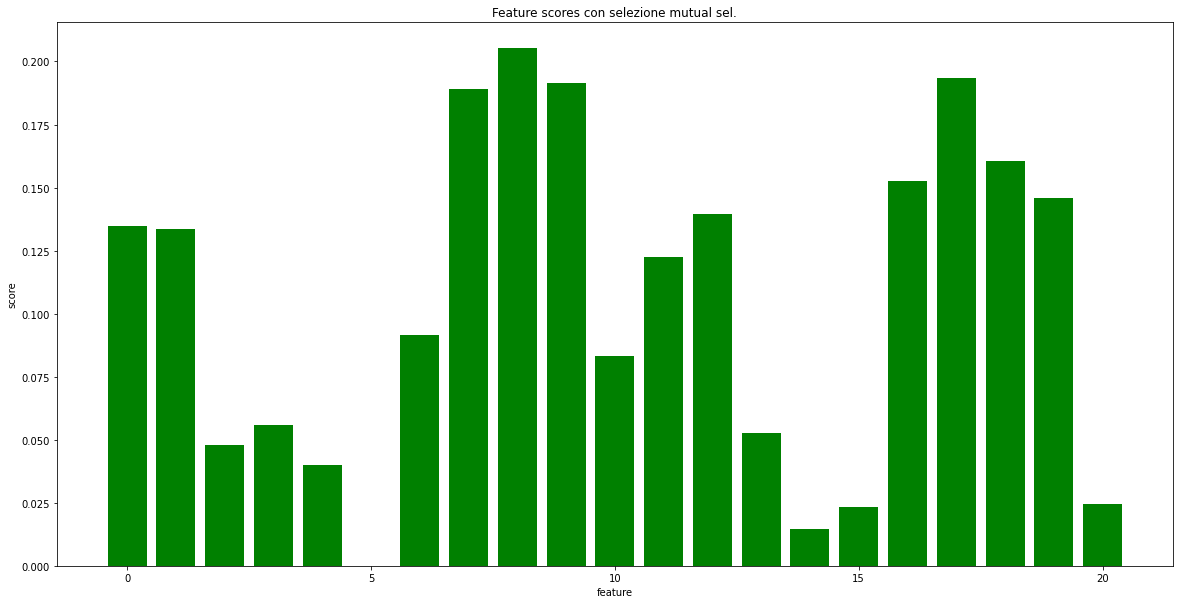

In [18]:
#MUTUAL SELECTION
#effettuiamo la selezione considerando tutte le features

fs = SelectKBest(score_func=mutual_info_classif, k = "all")
fs.fit(x_train, y_train)
x_train_fs = fs.transform(x_train)
x_test_fs = fs.transform(x_test)

rows = []
for i in range(len(fs.scores_)):
    rows.append([i, fs.scores_[i]])

scoresDF = pd.DataFrame(rows, columns = ["feature", "score"])

#generiamo un grafico per visualizzare meglio questi risultati

fig, ax = plt.subplots(figsize = (20, 10))

plt.bar(scoresDF["feature"], scoresDF["score"], color = "green")

plt.xlabel("feature")
plt.ylabel("score")
plt.title("Feature scores con selezione mutual sel.")

Text(0.5, 1.0, 'Feature scores con selezione ANOVA')

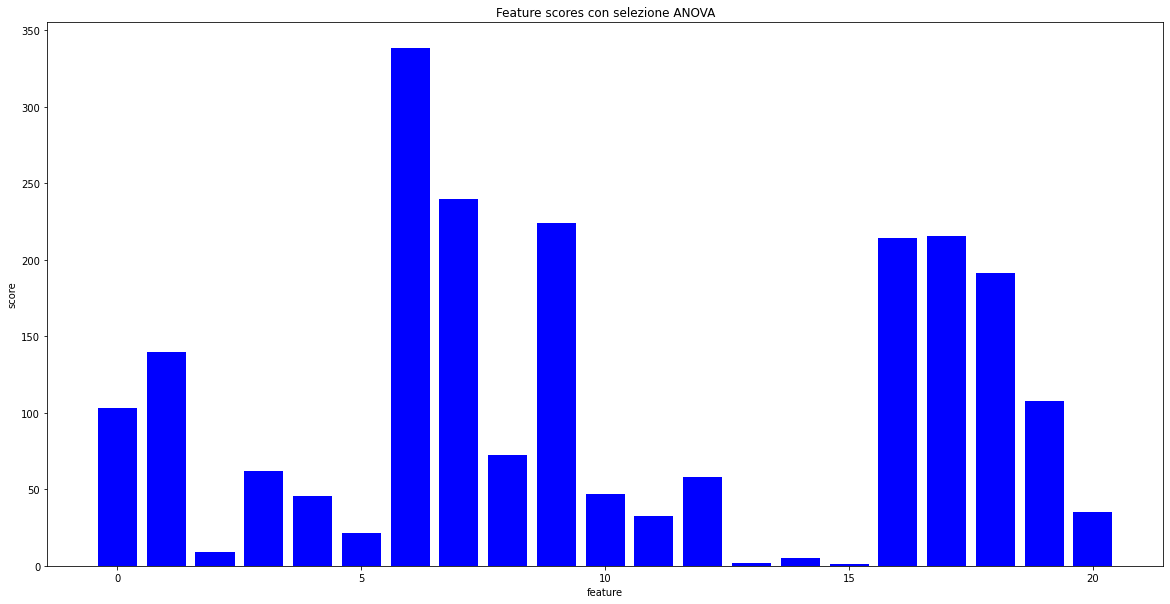

In [19]:
#ANOVA SELECTION
fs = SelectKBest(score_func = f_classif,k = "all")
fs.fit(x_train, y_train)
x_train_fs = fs.transform(x_train)
x_test_fs = fs.transform(x_test)

rows = []
for i in range(len(fs.scores_)):
    rows.append([i, fs.scores_[i]])

scoresDF = pd.DataFrame(rows, columns = ["feature", "score"])


fig, ax = plt.subplots(figsize = (20, 10))

plt.bar(scoresDF["feature"], scoresDF["score"], color = "blue")

plt.xlabel("feature")
plt.ylabel("score")
plt.title("Feature scores con selezione ANOVA")


Notiamo che i due approcci forniscono due risultati divergenti. Tuttavia possiamo identificare le features migliori vedendo quali hanno ottenuto un punteggio alto nelle due selezioni.
Le migliori sono: 6,7,9,17.

Rispettivamente:

    "severe_decelerations"
    "prolongued_decelerations"
    "mean_value_of_short_term_variability"
    "histogram_mode"
    "fetal_health"



## Modelli Predittivi

Utilizzeremo i seguenti modelli: 
  - Logistic Regression
  - Random Forest
  - K Nearest Neighbors

Il training sarà composto dalle seguenti parti:

  - strada 1
  - strada 2

La prima consiste nell'utilizzo di tutte le features, la seconda nell'avvalerci solo di quelle più importanti emerse in precedenza.

Fatta questa distinzione, per ogni strada effettueremo uno spot checking e una validazione degli iperparametri dei modelli migliori per poi passare al training vero e proprio e infine al test.

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier as RandomForest
from sklearn.neighbors import KNeighborsClassifier as KNN

### Metriche di valutazione

L'accuratezza potrebbe non essere la scelta migliore in quanto il nostro dataset non è propriamente bilanciato. La **micro-accuracy** può risolvere il problema. Possiamo però anche avvalerci della **matrice di confusione**.

### Strada 1

Instanziamo i modelli

In [21]:
models = {}

#popoliamo il dizionario con i modelli 
models["LogisticRegr"] = LogisticRegression()
for e in [50, 100, 150]:
    models["RandomForest-" + str(e)] = RandomForest(n_estimators = e)
    
for k in [1,2,3,5,10,15]:
    models["KNN-" + str(k)] = KNN(n_neighbors = k)
    
print("Lavoriamo con i seguenti modelli:")
print("")

for i, k in enumerate(models):
    print(str(i) + ") " + str(k) + " " + str(models[k]))
    

Lavoriamo con i seguenti modelli:

0) LogisticRegr LogisticRegression()
1) RandomForest-50 RandomForestClassifier(n_estimators=50)
2) RandomForest-100 RandomForestClassifier()
3) RandomForest-150 RandomForestClassifier(n_estimators=150)
4) KNN-1 KNeighborsClassifier(n_neighbors=1)
5) KNN-2 KNeighborsClassifier(n_neighbors=2)
6) KNN-3 KNeighborsClassifier(n_neighbors=3)
7) KNN-5 KNeighborsClassifier()
8) KNN-10 KNeighborsClassifier(n_neighbors=10)
9) KNN-15 KNeighborsClassifier(n_neighbors=15)


Spot check

In [22]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

resultsMicroAcc = {}
print("Micro accuracy scores: ")
for k in models:
    skf = StratifiedKFold(n_splits = 4)
    model = models[k]
    result = cross_val_score(model, x_train, y_train, cv=skf,
                                            scoring = "f1_micro")
    resultsMicroAcc[k] = result.mean()
    print(k, resultsMicroAcc[k])
    
print()

resultsAcc = {}
#salviamo anche i risultati ottenuti con la metrica dell'accuratezza per curiosità
print("Accuracy scores: ")
for k in models:
    skf = StratifiedKFold(n_splits = 4)
    model = models[k]
    result = cross_val_score(model, x_train, y_train, cv=skf,
                                            scoring = "accuracy")
    resultsAcc[k] = result.mean()
    print(k, resultsAcc[k])

Micro accuracy scores: 
LogisticRegr 0.8837365591397849
RandomForest-50 0.9247311827956989
RandomForest-100 0.9321236559139784
RandomForest-150 0.9294354838709677
KNN-1 0.8978494623655914
KNN-2 0.8884408602150538
KNN-3 0.9045698924731183
KNN-5 0.8971774193548386
KNN-10 0.8776881720430108
KNN-15 0.8756720430107527

Accuracy scores: 
LogisticRegr 0.8837365591397849
RandomForest-50 0.9280913978494624
RandomForest-100 0.926747311827957
RandomForest-150 0.9341397849462365
KNN-1 0.8978494623655914
KNN-2 0.8884408602150538
KNN-3 0.9045698924731183
KNN-5 0.8971774193548386
KNN-10 0.8776881720430108
KNN-15 0.8756720430107527


Possiamo notare come anche l'accuratezza abbia generalmente un buon punteggio. I valori sono molto simili a quelli della micro-accuratezza per il modello KNN.

In [23]:
#Modelli scelti

def find_key(val, d):
    return [k for k, v in d.items() if v == val]


results1 = [k1 for k1 in resultsMicroAcc.values()]
results2 = [k2 for k2 in resultsAcc.values()]
allRes = results1 + results2


first_best = max(allRes)
if first_best in results1:
    model1 = find_key(first_best, resultsMicroAcc)
else:
    model1 = find_key(first_best, resultsAcc)

model1 = model1[0].split("-")[0]

print('Miglior modello utlizzando tutte le features: %s con punteggio %.5f' % (model1, first_best))    

allRes.remove(first_best)

finish = False
while finish == False:
    second_best = max(allRes)
    if second_best in results1:
        model2 = find_key(second_best, resultsMicroAcc)
    
    if second_best in results2:
        model2 = find_key(second_best, resultsAcc)
        
    model2 = model2[0].split("-")[0]

    if model2 == model1:
        allRes.remove(second_best)
        pass
    if model2 != model1:
        finish = True


print('Secondo miglior modello utilizzando tutte le features: %s con punteggio %.5f' % (model2, second_best))    
    

Miglior modello utlizzando tutte le features: RandomForest con punteggio 0.93414
Secondo miglior modello utilizzando tutte le features: KNN con punteggio 0.90457


Studio Iperparametri

In [24]:
#Gridsearch
from sklearn.model_selection import GridSearchCV

model1 = RandomForest()
model2 = KNN()

print(model1, model2)


#costruiamo un diz per i valori per gli iperparametri
params1 = {"n_estimators": [50, 100, 150],
          "max_depth" : [2, 5, 10, 25, 50, 100, None],
          "min_samples_split" : [0.001, 0.01, 0.1, 0.2],
          "max_features" : ["sqrt", "log2", None]}


#costruiamo la griglia
grid1 = GridSearchCV(estimator = model1,
                   param_grid = params1,
                   scoring = "f1_micro",
                   cv = 4,
                   verbose = 4)

grid1.fit(x_train, y_train)

RandomForestClassifier() KNeighborsClassifier()
Fitting 4 folds for each of 252 candidates, totalling 1008 fits
[CV 1/4] END max_depth=2, max_features=sqrt, min_samples_split=0.001, n_estimators=50;, score=0.839 total time=   0.1s
[CV 2/4] END max_depth=2, max_features=sqrt, min_samples_split=0.001, n_estimators=50;, score=0.841 total time=   0.1s
[CV 3/4] END max_depth=2, max_features=sqrt, min_samples_split=0.001, n_estimators=50;, score=0.871 total time=   0.1s
[CV 4/4] END max_depth=2, max_features=sqrt, min_samples_split=0.001, n_estimators=50;, score=0.879 total time=   0.1s
[CV 1/4] END max_depth=2, max_features=sqrt, min_samples_split=0.001, n_estimators=100;, score=0.833 total time=   0.2s
[CV 2/4] END max_depth=2, max_features=sqrt, min_samples_split=0.001, n_estimators=100;, score=0.841 total time=   0.2s
[CV 3/4] END max_depth=2, max_features=sqrt, min_samples_split=0.001, n_estimators=100;, score=0.847 total time=   0.2s
[CV 4/4] END max_depth=2, max_features=sqrt, min_sam

GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 10, 25, 50, 100, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_split': [0.001, 0.01, 0.1, 0.2],
                         'n_estimators': [50, 100, 150]},
             scoring='f1_micro', verbose=4)

In [25]:
print("Iperparametri migliori random forest: ", grid1.best_params_)
print("Punteggio migliore: {:.2f}".format(grid1.best_score_))
#memorizziamo gli iperparametri migliori in una variabile
hypr1 = grid1.best_params_


Iperparametri migliori random forest:  {'max_depth': 100, 'max_features': 'log2', 'min_samples_split': 0.001, 'n_estimators': 50}
Punteggio migliore: 0.93


In [26]:
#costruiamo un diz per i valori per gli iperparametri
params2 = {"n_neighbors": [1,2,3,5,10,15],
          "algorithm" : ["auto", "ball_tree", "kd_tree"],
          "leaf_size" : [20,30,35,40]}


#costruiamo la griglia
grid2 = GridSearchCV(estimator = model2,
                   param_grid = params2,
                   scoring = "f1_micro",
                   cv = 4,
                   verbose = 4)

grid2.fit(x_train, y_train)


Fitting 4 folds for each of 72 candidates, totalling 288 fits
[CV 1/4] END algorithm=auto, leaf_size=20, n_neighbors=1;, score=0.911 total time=   0.0s
[CV 2/4] END algorithm=auto, leaf_size=20, n_neighbors=1;, score=0.901 total time=   0.0s
[CV 3/4] END algorithm=auto, leaf_size=20, n_neighbors=1;, score=0.874 total time=   0.0s
[CV 4/4] END algorithm=auto, leaf_size=20, n_neighbors=1;, score=0.906 total time=   0.0s
[CV 1/4] END algorithm=auto, leaf_size=20, n_neighbors=2;, score=0.892 total time=   0.0s
[CV 2/4] END algorithm=auto, leaf_size=20, n_neighbors=2;, score=0.884 total time=   0.0s
[CV 3/4] END algorithm=auto, leaf_size=20, n_neighbors=2;, score=0.884 total time=   0.0s
[CV 4/4] END algorithm=auto, leaf_size=20, n_neighbors=2;, score=0.892 total time=   0.0s
[CV 1/4] END algorithm=auto, leaf_size=20, n_neighbors=3;, score=0.914 total time=   0.0s
[CV 2/4] END algorithm=auto, leaf_size=20, n_neighbors=3;, score=0.917 total time=   0.0s
[CV 3/4] END algorithm=auto, leaf_size

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree'],
                         'leaf_size': [20, 30, 35, 40],
                         'n_neighbors': [1, 2, 3, 5, 10, 15]},
             scoring='f1_micro', verbose=4)

In [27]:
print("Iperparametri migliori del KNN: ", grid2.best_params_)
print("Punteggio migliore: {:.2f}".format(grid2.best_score_))
#memorizziamo gli iperparametri migliori in una variabile
hypr2 = grid2.best_params_


Iperparametri migliori del KNN:  {'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 3}
Punteggio migliore: 0.90


Training dei modelli migliori

In [28]:
#Costruiamo i modelli con gli iperparametri migliori e testiamo

model1 = RandomForest(n_estimators=hypr1["n_estimators"], max_depth = hypr1["max_depth"],
                      min_samples_split = hypr1["min_samples_split"], max_features = hypr1["max_features"])

model2 = KNN(n_neighbors = hypr2["n_neighbors"], algorithm = hypr2["algorithm"], leaf_size = hypr2["leaf_size"])

Test dei modelli migliori

In [29]:
from sklearn.metrics import f1_score

model1.fit(x_train, y_train)
pred1 = model1.predict(x_test)
acc1 = f1_score(y_test, pred1, average = "micro")
print("Micro-ccuratezza del modello Random Forest sul test set: {:.2f}".format(acc1))

Micro-ccuratezza del modello Random Forest sul test set: 0.95


In [30]:
model2.fit(x_train, y_train)
pred2 = model2.predict(x_test)
acc2 = f1_score(y_test, pred2, average = "micro")
print("Micro-accuratezza del modello KNN sul test set: {:.2f}".format(acc2))

Micro-accuratezza del modello KNN sul test set: 0.91


### Strada 2

Ripetiamo il procedimento

In [31]:
#creo un nuovo dataframe con le features più rilevanti
df2 = df[["severe_decelerations", "prolongued_decelerations", "mean_value_of_short_term_variability", 
          "histogram_mode", "fetal_health"]]
df2.head()

,severe_decelerations,prolongued_decelerations,mean_value_of_short_term_variability,histogram_mode,fetal_health
0,0.0,0.0,0.5,120.0,2
1,0.0,0.0,2.1,141.0,1
2,0.0,0.0,2.1,141.0,1
3,0.0,0.0,2.4,137.0,1
4,0.0,0.0,2.4,137.0,1


In [32]:
x1 = df2.iloc[:,:-1]
y1 = df2.iloc[:,-1] 

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2)
print("Train set: ", x1_train.shape)
print("Test set: ", x1_test.shape)

Train set:  (1688, 4)
Test set:  (423, 4)


In [33]:
scaler = MinMaxScaler()
x1_train = scaler.fit_transform(x1_train)
x1_test = scaler.transform(x1_test)

Lavoriamo di nuovo con i seguenti modelli:

  - 0 LogisticRegr LogisticRegression()
  - 1 RandomForest-50 RandomForestClassifier(n_estimators=50)
  - 2 RandomForest-100 RandomForestClassifier()
  - 3 RandomForest-150 RandomForestClassifier(n_estimators=150)
  - 4 KNN-1 KNeighborsClassifier()
  - 5 KNN-2 KNeighborsClassifier()
  - 6 KNN-3 KNeighborsClassifier()
  - 7 KNN-5 KNeighborsClassifier()
  - 8 KNN-10 KNeighborsClassifier()
  - 9 KNN-15 KNeighborsClassifier()

Spot checking

In [34]:
resultsMicroAcc2 = {}
print("Micro accuracy scores: ")
for k in models:
    skf = StratifiedKFold(n_splits = 4)
    model = models[k]
    result = cross_val_score(model, x1_train, y1_train, cv=skf,
                                            scoring = "f1_micro")
    resultsMicroAcc2[k] = result.mean()
    print(k, resultsMicroAcc2[k])
    
print()


Micro accuracy scores: 
LogisticRegr 0.8104265402843602
RandomForest-50 0.872037914691943
RandomForest-100 0.8738151658767772
RandomForest-150 0.8767772511848341
KNN-1 0.8542654028436019
KNN-2 0.8708530805687204
KNN-3 0.8672985781990521
KNN-5 0.8732227488151658
KNN-10 0.8672985781990521
KNN-15 0.8720379146919431



In [35]:
results = [k1 for k1 in resultsMicroAcc2.values()]


first_best = max(results)
model3 = find_key(first_best, resultsMicroAcc2)

model3 = model3[0].split("-")[0]

print('Miglior modello utilizzando le feature più rilevanti: %s con punteggio %.5f' % (model3, first_best))    

results.remove(first_best)

finish = False
while finish == False:
    second_best = max(results)
    model4 = find_key(second_best, resultsMicroAcc2)
        
    model4 = model4[0].split("-")[0]

    if model4 == model3:
        results.remove(second_best)
        pass
    if model4 != model3:
        finish = True


print('Secondo miglior modello utilizzando le feature più rilevanti: %s con punteggio %.5f' % (model4, second_best))    
    

Miglior modello utilizzando le feature più rilevanti: RandomForest con punteggio 0.87678
Secondo miglior modello utilizzando le feature più rilevanti: KNN con punteggio 0.87322


Studio iperparametri

In [36]:
model3 = RandomForest()
model4 = KNN()

params3 = {"n_estimators": [50, 100, 150],
          "max_depth" : [2, 5, 10, 25, 50, 100, None],
          "min_samples_split" : [0.001, 0.01, 0.1, 0.2],
          "max_features" : ["sqrt", "log2", None]}


#costruiamo la griglia
grid3 = GridSearchCV(estimator = model3,
                   param_grid = params3,
                   scoring = "f1_micro",
                   cv = 4,
                   verbose = 4)

grid3.fit(x1_train, y1_train)

Fitting 4 folds for each of 252 candidates, totalling 1008 fits
[CV 1/4] END max_depth=2, max_features=sqrt, min_samples_split=0.001, n_estimators=50;, score=0.851 total time=   0.1s
[CV 2/4] END max_depth=2, max_features=sqrt, min_samples_split=0.001, n_estimators=50;, score=0.877 total time=   0.1s
[CV 3/4] END max_depth=2, max_features=sqrt, min_samples_split=0.001, n_estimators=50;, score=0.867 total time=   0.1s
[CV 4/4] END max_depth=2, max_features=sqrt, min_samples_split=0.001, n_estimators=50;, score=0.867 total time=   0.1s
[CV 1/4] END max_depth=2, max_features=sqrt, min_samples_split=0.001, n_estimators=100;, score=0.851 total time=   0.2s
[CV 2/4] END max_depth=2, max_features=sqrt, min_samples_split=0.001, n_estimators=100;, score=0.877 total time=   0.2s
[CV 3/4] END max_depth=2, max_features=sqrt, min_samples_split=0.001, n_estimators=100;, score=0.872 total time=   0.2s
[CV 4/4] END max_depth=2, max_features=sqrt, min_samples_split=0.001, n_estimators=100;, score=0.867

GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 10, 25, 50, 100, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_split': [0.001, 0.01, 0.1, 0.2],
                         'n_estimators': [50, 100, 150]},
             scoring='f1_micro', verbose=4)

In [37]:
print("Iperparametri migliori random forest: ", grid3.best_params_)
print("Punteggio migliore: {:.2f}".format(grid3.best_score_))
#memorizziamo gli iperparametri migliori in una variabile
hypr3 = grid3.best_params_


Iperparametri migliori random forest:  {'max_depth': 100, 'max_features': 'log2', 'min_samples_split': 0.01, 'n_estimators': 50}
Punteggio migliore: 0.88


In [38]:
params4 = {"n_neighbors": [1,2,3,5,10,15],
          "algorithm" : ["auto", "ball_tree", "kd_tree"],
          "leaf_size" : [20,30,35,40]}


grid4 = GridSearchCV(estimator = model4,
                   param_grid = params4,
                   scoring = "f1_micro",
                   cv = 4,
                   verbose = 4)

grid4.fit(x1_train, y1_train)

Fitting 4 folds for each of 72 candidates, totalling 288 fits
[CV 1/4] END algorithm=auto, leaf_size=20, n_neighbors=1;, score=0.855 total time=   0.0s
[CV 2/4] END algorithm=auto, leaf_size=20, n_neighbors=1;, score=0.846 total time=   0.0s
[CV 3/4] END algorithm=auto, leaf_size=20, n_neighbors=1;, score=0.853 total time=   0.0s
[CV 4/4] END algorithm=auto, leaf_size=20, n_neighbors=1;, score=0.863 total time=   0.0s
[CV 1/4] END algorithm=auto, leaf_size=20, n_neighbors=2;, score=0.855 total time=   0.0s
[CV 2/4] END algorithm=auto, leaf_size=20, n_neighbors=2;, score=0.882 total time=   0.0s
[CV 3/4] END algorithm=auto, leaf_size=20, n_neighbors=2;, score=0.870 total time=   0.0s
[CV 4/4] END algorithm=auto, leaf_size=20, n_neighbors=2;, score=0.877 total time=   0.0s
[CV 1/4] END algorithm=auto, leaf_size=20, n_neighbors=3;, score=0.860 total time=   0.0s
[CV 2/4] END algorithm=auto, leaf_size=20, n_neighbors=3;, score=0.874 total time=   0.0s
[CV 3/4] END algorithm=auto, leaf_size

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree'],
                         'leaf_size': [20, 30, 35, 40],
                         'n_neighbors': [1, 2, 3, 5, 10, 15]},
             scoring='f1_micro', verbose=4)

In [39]:
print("Iperparametri migliori random forest: ", grid4.best_params_)
print("Punteggio migliore: {:.2f}".format(grid4.best_score_))
#memorizziamo gli iperparametri migliori in una variabile
hypr4 = grid4.best_params_

Iperparametri migliori random forest:  {'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 5}
Punteggio migliore: 0.87


Training

In [40]:
model3 = RandomForest(n_estimators=hypr3["n_estimators"], max_depth = hypr3["max_depth"],
                      min_samples_split = hypr3["min_samples_split"], max_features = hypr3["max_features"])

model4 = KNN(n_neighbors = hypr4["n_neighbors"], algorithm = hypr4["algorithm"], leaf_size = hypr4["leaf_size"])

In [41]:
model3.fit(x1_train, y1_train)
pred3 = model3.predict(x1_test)
acc3 = f1_score(y1_test, pred3, average = "micro")
print("Micro-accuratezza del modello Random Forest sul test set: {:.2f}".format(acc3))

Micro-accuratezza del modello Random Forest sul test set: 0.85


In [42]:
model4.fit(x1_train, y1_train)
pred4 = model4.predict(x1_test)
acc4 = f1_score(y1_test, pred4, average = "micro")
print("Micro-accuratezza del modello Random Forest sul test set: {:.2f}".format(acc4))

Micro-accuratezza del modello Random Forest sul test set: 0.83


In [43]:
print("Migliore accuratezza in assoluto: %.2f"%(max(acc1, acc2, acc3, acc4)))

Migliore accuratezza in assoluto: 0.95


## Conclusione

Il modello che ha avuto la miglior performance è la Random Forest.

Il punteggio è buono considerando il dataset non bilanciato. Inoltre questo  è stato raggiunto dal modello che ha operato su tutte le features e non solo su quelle più rilevanti. Tuttavia dato il risultato del modello che ha operato su meno features, possiamo dire che potrebbe essere un compromesso accettabile tenendo conto di performance e computazione.

Lo spot checking è stata  una tecnica utile per avere rapidamente una prima impressione sulle performance dei diversi modelli, che accompagnata allo studio degli iperparametri ci ha garantito di poter utilizzare effettivamente il modello migliore. 

Grazie all'utilizzo della funzione GridSearch per la validazione degli iperparametri abbiamo potuto evitare di dividere il dataset in train set, test set ed evalutaion set lasciando soltanto i primi due, il che ha velocizzato ulteriormente il processo.

A partire dai modelli a disposizione era tuttavia prevedibile quale sarebbe stato il migliore principalmente per un motivo: la Random Forest è un modello ensemble, ovvero combina diversi modelli base per avere una migliore prestazione. In questo caso il modello base della Random Forest è il Decision Tree, infatti ritroviamo i parametri del modello base in quello ensemble (come ad esempio max_depth).

In definitiva l'ottimizzazione ottenuta sui dati (features e outliers) e sui modelli ci ha permesso di risparmiare molta computazione senza andare ad intaccare la precisione dei modelli. Possiamo dirci soddisfatti dei risultati ottenuti.

